# Life Changes and Progress in the Middle East

In [1]:
#Include needed Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


### Load Indicators

In [2]:
indicatorsValues = pd.read_csv('./world-development-indicators/Indicators.csv')
indicatorsValues.shape

(5656458, 6)

### Load List of Countries

In [3]:
countries = pd.read_csv('./world-development-indicators/Country.csv')

In [4]:
#Find Arab Countries
arabCountries = countries[countries['Region']=='Middle East & North Africa']

### Filter Indicator Values by arabCountries

In [6]:
arabCountriesindicators = indicatorsValues[indicatorsValues['CountryCode'].isin(arabCountries['CountryCode'].tolist())]

### List Available Indicators for Arab Countries

In [7]:
print(arabCountriesindicators['IndicatorName'].unique())

['Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Age dependency ratio (% of working-age population)'
 'Age dependency ratio, old (% of working-age population)' ...,
 'Fish species, threatened' 'Mammal species, threatened'
 'Plant species (higher), threatened']


### Filter Data of the Adult Litracty Indicator

In [8]:
arabAdultlitracyRates = arabCountriesindicators[arabCountriesindicators['IndicatorCode']=='SE.ADT.LITR.ZS']
worldAdultlitracyRates = indicatorsValues[indicatorsValues['IndicatorCode']=='SE.ADT.LITR.ZS']

# Arab Vs. World Literacy Rates

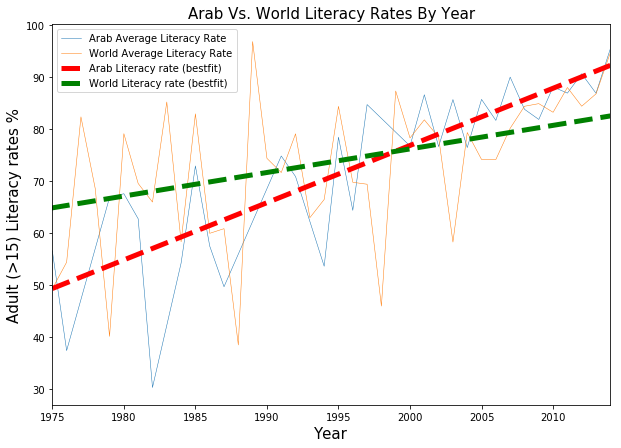

In [68]:
fig, axis = plt.subplots(figsize=(10, 7))

axis.set_title('Arab Vs. World Literacy Rates By Year',fontsize=15)
axis.set_xlabel('Year',fontsize=15)
axis.set_ylabel('Adult (>15) Literacy rates %',fontsize=15)

arabAdultlitracyRates.groupby(['Year']).mean()['Value'].plot(ax=axis,linewidth = 0.5,label="Arab Average Literacy Rate")
worldAdultlitracyRates.groupby(['Year']).mean()['Value'].plot(ax=axis,linewidth = 0.5,label="World Average Literacy Rate")

x = arabAdultlitracyRates['Year'].unique()
y = arabAdultlitracyRates.groupby(['Year']).mean()['Value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",linewidth = 5,label = "Arab Literacy rate (bestfit)")

x = worldAdultlitracyRates['Year'].unique()
y = worldAdultlitracyRates.groupby(['Year']).mean()['Value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--",linewidth = 5,label = "World Literacy rate (bestfit)")
axis.set_xlim(1975,2014)
plt.legend()
plt.show()

### Filter by data by Life Expectancy (years)

In [39]:
arabLifeExpectancy = arabCountriesindicators[arabCountriesindicators['IndicatorCode']=='SP.DYN.LE00.IN']
worldLifeExpectancy = indicatorsValues[indicatorsValues['IndicatorCode']=='SP.DYN.LE00.IN']

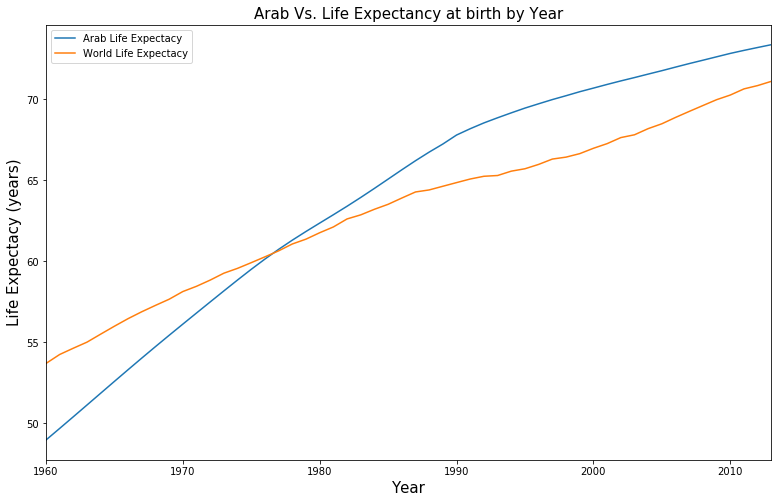

In [42]:
fig, axis = plt.subplots(figsize=(13, 8))
axis.yaxis.grid(True)

axis.set_title('Arab Vs. Life Expectancy at birth by Year',fontsize=15)
axis.set_xlabel('Birth Year',fontsize=15)
axis.set_ylabel('Life Expectacy (years)',fontsize=15)

arabLifeExpectancy.groupby(['Year']).mean()['Value'].plot(ax=axis,label="Arab Life Expectacy")
worldLifeExpectancy.groupby(['Year']).mean()['Value'].plot(ax=axis,label="World Life Expectacy")

plt.legend()
plt.show()

### Filter by BroadBand Per 100 Person

In [69]:
arabBroadBand = arabCountriesindicators[arabCountriesindicators['IndicatorCode']=='SH.MED.BEDS.ZS']

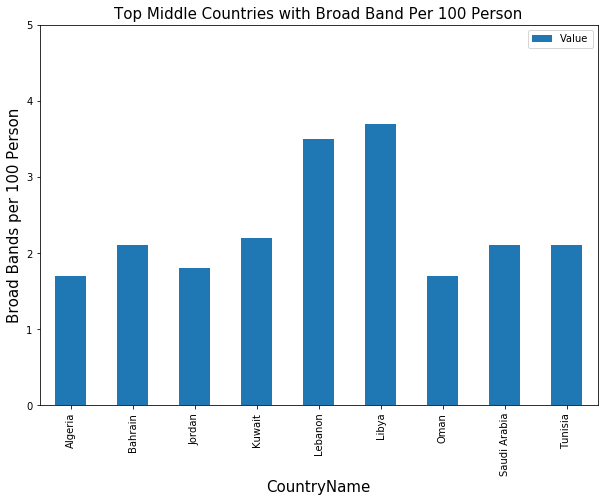

In [87]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Top Middle Countries with Broad Band Per 100 Person',fontsize=15)
axis.set_xlabel('Year',fontsize=15)
axis.set_ylabel('Broad Bands per 100 Person',fontsize=15)
axis.set_ylim([0,5])
data = arabBroadBand[['CountryName','Value']].groupby(['CountryName'],as_index=False).last()
data = data[data['Value']>data['Value'].mean()]
data.plot(x = data['CountryName'],kind = 'bar',figsize=(10, 7),ax = axis)
plt.show()

### Filter by Adjusted net national income per capita (constant 2005 US$)

In [25]:
arabAverageNationalIncome = arabCountriesindicators[arabCountriesindicators['IndicatorCode']=='NY.ADJ.NNTY.PC.KD']

In [26]:
currentIncomeByCountry = arabAverageNationalIncome.groupby('CountryCode', as_index=False).mean()

In [88]:
import folium

In [89]:
country_geo = 'geo/world-countries.json'

In [90]:
map = folium.Map(location=[30, 30], zoom_start=3)

In [91]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map.choropleth(geo_data=country_geo, data=currentIncomeByCountry,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlOrBr', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Income  US$ 2005')

In [92]:
# Create Folium plot
map.save('plot_data.html')

In [93]:
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')